In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e22/sample_submission.csv
/kaggle/input/playground-series-s3e22/train.csv
/kaggle/input/playground-series-s3e22/test.csv


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_path = "/kaggle/input/playground-series-s3e22/train.csv"
test_path = "/kaggle/input/playground-series-s3e22/test.csv"

train_set = pd.read_csv(train_path, index_col = 0)
train_set_2 = train_set.copy()
test_set = pd.read_csv(test_path, index_col = 0)

In [4]:
train_set

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived


## Enumerating Nominal columns

### Using Maps

In [5]:
train_set.surgery = train_set.surgery.map({'yes' : 1, 'no' : 0})

In [6]:
train_set.age = train_set.age.map({'young':0, 'adult':1})

In [7]:
train_set.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,1,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,1,1,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,1,1,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,0,1,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


### To get columns having string data(and hence, nominal data), this code can be run:

In [8]:
nominal_col_list = []
for i in train_set.columns:
    if train_set[i].dtype == 'O':
        nominal_col_list.append(i)
nominal_col_list

['temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data',
 'outcome']

## Printing unique values of the columns having nominal data

In [9]:
for i in nominal_col_list:
    distinct = np.nan_to_num(train_set[i].unique())
    print(f"Unique elements in col {i} are :{distinct}")

Unique elements in col temp_of_extremities are :['cool' 'cold' 'normal' 'warm' nan]
Unique elements in col peripheral_pulse are :['reduced' 'normal' nan 'absent' 'increased']
Unique elements in col mucous_membrane are :['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red' nan]
Unique elements in col capillary_refill_time are :['more_3_sec' 'less_3_sec' nan '3']
Unique elements in col pain are :['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' nan 'slight']
Unique elements in col peristalsis are :['absent' 'hypomotile' 'normal' 'hypermotile' nan 'distend_small']
Unique elements in col abdominal_distention are :['slight' 'moderate' 'none' 'severe' nan]
Unique elements in col nasogastric_tube are :['slight' 'none' 'significant' nan]
Unique elements in col nasogastric_reflux are :['less_1_liter' 'more_1_liter' 'none' nan 'slight']
Unique elements in col rectal_exam_feces are :['decreased' 'absent' nan 'normal' 'increased' 'serosanguious']
Unique

## Fuckery Starts Here

In [20]:
# def enum(cols):
#     cols["temp_of_extremities"] = np.where(train_set['temp_of_extremities'].unique() == cols['temp_of_extremities'])[0]
#     cols.peripheral_pulse = np.where(train_set.peripheral_pulse.unique() == cols.peripheral_pulse)[0]
#     return cols
# train_set = train_set.apply(enum, axis = 'columns')

In [21]:
train_set = train_set.fillna(0)

In [22]:
train_set.head(20)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,1,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,1,1,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,1,1,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,0,1,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
5,0,1,529642,38.1,56.0,32.0,normal,normal,bright_pink,less_3_sec,...,49.0,8.0,cloudy,2.8,no,0,0,0,yes,lived
6,1,1,534787,38.3,36.0,16.0,cool,reduced,normal_pink,less_3_sec,...,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
7,0,1,529461,39.2,114.0,24.0,cool,reduced,pale_cyanotic,more_3_sec,...,57.0,7.6,serosanguious,4.5,yes,2207,0,0,yes,died
8,0,1,528742,37.4,48.0,12.0,cool,reduced,normal_pink,less_3_sec,...,40.0,7.8,cloudy,2.6,no,0,0,0,yes,lived


## Lets create a function to enumerate a given column name list

In [23]:
def enum_cols(l,train_set):
        def enum(cols):
            for i in l:
                cols[i] = (np.where(train_set[i].unique() == cols[i])[0]+1)# this is to give a non zero value to the first index
            return cols
        train_set = train_set.apply(enum, axis = 'columns')
        return train_set

## Getting the unique array of outcomes, i.e., label column

In [24]:
train_set.outcome.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [25]:
train_set = enum_cols(['temp_of_extremities','peripheral_pulse','mucous_membrane','abdomo_appearance','abdomen', 'rectal_exam_feces','nasogastric_reflux', 'nasogastric_tube', 'abdominal_distention', 'peristalsis', 'pain', 'capillary_refill_time','cp_data','outcome'],train_set)

## But we haven't One hot encoded them

In [26]:
pd.DataFrame(train_set.head(20))

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,530001,38.1,132.0,24.0,1,1,1,1,...,57.0,8.5,1,3.4,yes,2209,0,0,1,1
1,1,1,533836,37.5,88.0,12.0,1,2,2,1,...,33.0,64.0,1,2.0,yes,2208,0,0,1,2
2,1,1,529812,38.3,120.0,28.0,1,1,3,2,...,37.0,6.4,1,3.4,yes,5124,0,0,1,3
3,1,1,5262541,37.1,72.0,30.0,2,1,3,1,...,53.0,7.0,2,3.9,yes,2208,0,0,2,3
4,0,1,5299629,38.0,52.0,48.0,3,2,4,2,...,47.0,7.3,2,2.6,no,0,0,0,2,3
5,0,1,529642,38.1,56.0,32.0,3,2,5,2,...,49.0,8.0,2,2.8,no,0,0,0,2,3
6,1,1,534787,38.3,36.0,16.0,1,1,4,2,...,43.0,75.0,2,1.0,no,3111,0,0,2,2
7,0,1,529461,39.2,114.0,24.0,1,1,2,1,...,57.0,7.6,1,4.5,yes,2207,0,0,2,1
8,0,1,528742,37.4,48.0,12.0,1,1,4,2,...,40.0,7.8,2,2.6,no,0,0,0,2,3


In [27]:
train_set.peripheral_pulse[:20]

id
0     1
1     2
2     1
3     1
4     2
5     2
6     1
7     1
8     1
9     1
10    2
11    1
12    2
13    1
14    1
15    2
16    3
17    1
18    1
19    1
Name: peripheral_pulse, dtype: object

## Now our target is to replace the empty array with zero

### Uh, Oh! We missed the 'surgical_lesion' column. So we fix it...

In [28]:
train_set = enum_cols(['surgical_lesion'],train_set)
train_set

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,530001,38.1,132.0,24.0,1,1,1,1,...,57.0,8.5,1,3.4,1,2209,0,0,1,1
1,1,1,533836,37.5,88.0,12.0,1,2,2,1,...,33.0,64.0,1,2.0,1,2208,0,0,1,2
2,1,1,529812,38.3,120.0,28.0,1,1,3,2,...,37.0,6.4,1,3.4,1,5124,0,0,1,3
3,1,1,5262541,37.1,72.0,30.0,2,1,3,1,...,53.0,7.0,2,3.9,1,2208,0,0,2,3
4,0,1,5299629,38.0,52.0,48.0,3,2,4,2,...,47.0,7.3,2,2.6,2,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,1,535246,38.5,129.0,48.0,1,1,3,1,...,57.0,66.0,1,2.0,1,2206,0,0,1,3
1231,1,1,528570,37.5,60.0,50.0,1,1,2,2,...,35.0,6.4,1,3.6,1,2209,0,0,2,1
1232,1,0,529685,37.5,84.0,40.0,3,1,4,2,...,40.0,5.9,2,7.0,1,400,0,0,2,3


## Lets one hot encode the label ,i.e., the outcome

In [29]:
# outcome_col = pd.get_dummies(train_set['outcome']).astype(int)

# Ends Here

Stats of column  temp_of_extremities  : 
            count unique   top freq
outcome                           
died         399      4  cool  263
euthanized   239      4  cool  181
lived        558      4  cool  256


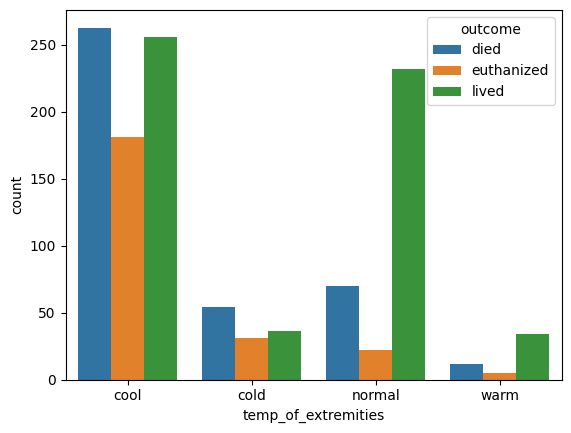

Stats of column  peripheral_pulse  : 
            count unique      top freq
outcome                              
died         401      4  reduced  305
euthanized   225      3  reduced  172
lived        549      4   normal  295


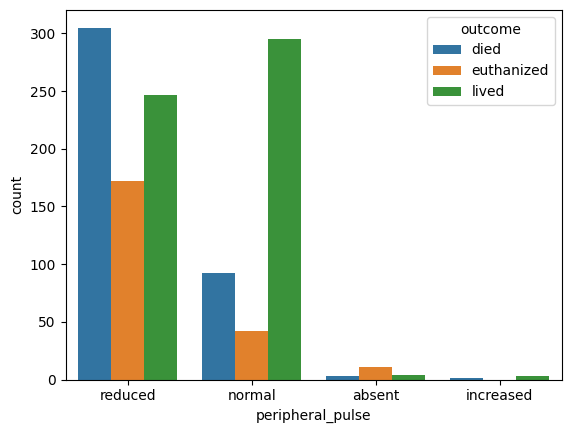

Stats of column  mucous_membrane  : 
            count unique            top freq
outcome                                    
died         403      6  pale_cyanotic  106
euthanized   246      6  pale_cyanotic   79
lived        565      6    normal_pink  194


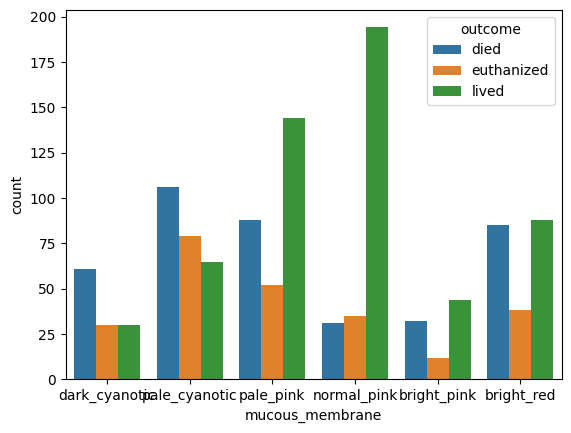

Stats of column  capillary_refill_time  : 
            count unique         top freq
outcome                                 
died         407      2  less_3_sec  217
euthanized   249      3  less_3_sec  143
lived        573      3  less_3_sec  474


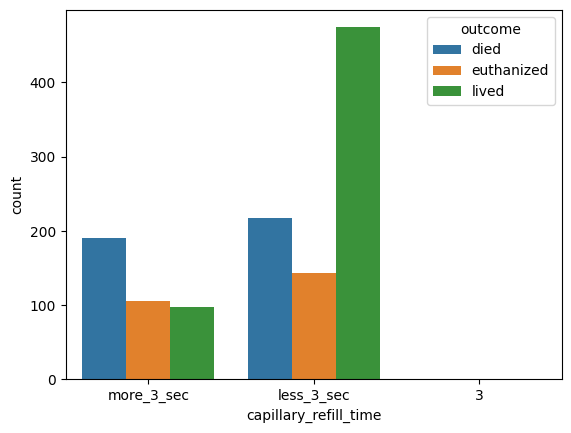

Stats of column  pain  : 
            count unique        top freq
outcome                                
died         405      5  depressed  175
euthanized   228      6  depressed  104
lived        558      5  mild_pain  281


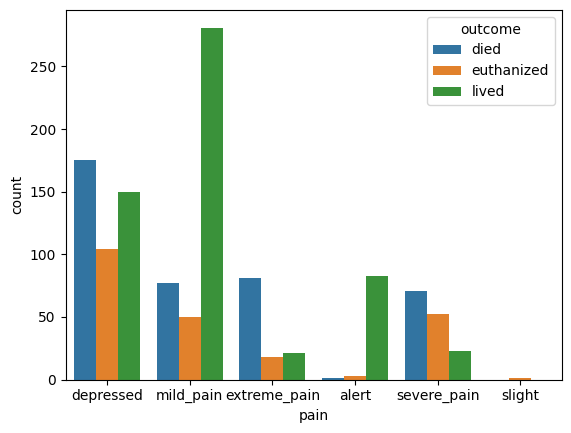

Stats of column  peristalsis  : 
            count unique         top freq
outcome                                 
died         405      4  hypomotile  225
euthanized   242      5      absent  137
lived        568      4  hypomotile  352


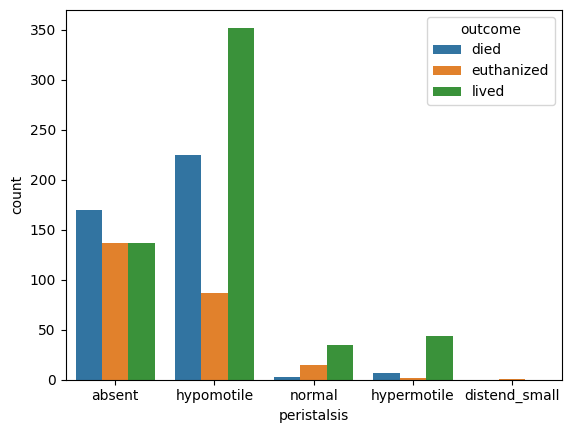

Stats of column  abdominal_distention  : 
            count unique       top freq
outcome                               
died         407      4  moderate  227
euthanized   236      4  moderate  117
lived        569      4    slight  209


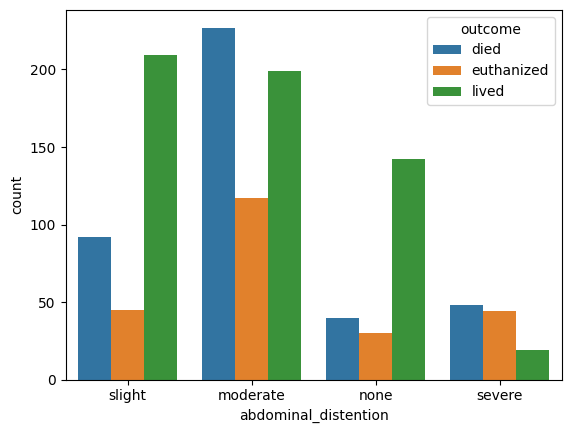

Stats of column  nasogastric_tube  : 
            count unique     top freq
outcome                             
died         379      3  slight  250
euthanized   223      3  slight  113
lived        553      3  slight  395


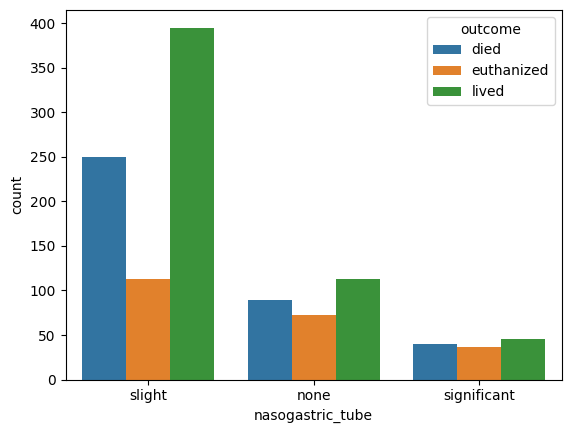

Stats of column  nasogastric_reflux  : 
            count unique           top freq
outcome                                   
died         405      3  more_1_liter  188
euthanized   250      3  more_1_liter  168
lived        559      4  more_1_liter  248


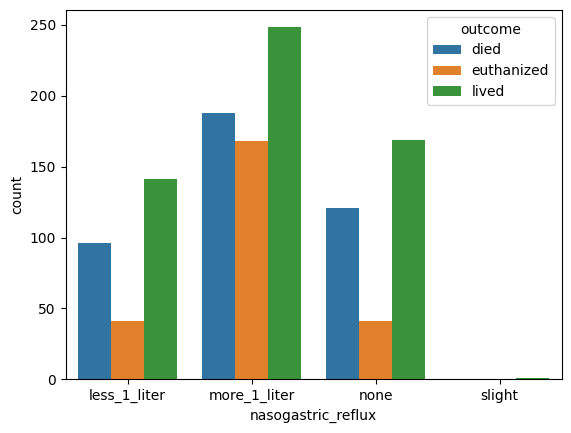

Stats of column  rectal_exam_feces  : 
            count unique     top freq
outcome                             
died         377      4  absent  221
euthanized   171      4  absent   96
lived        497      5  absent  176


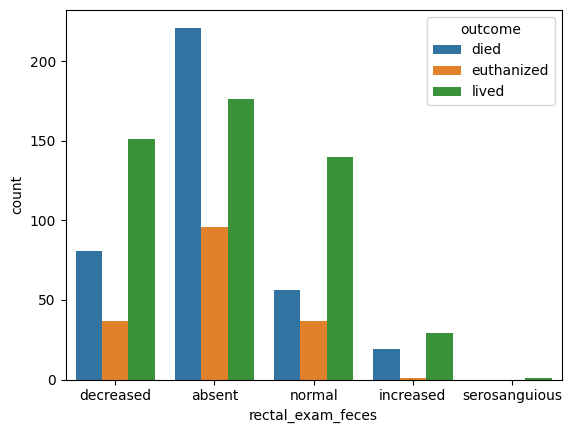

Stats of column  abdomen  : 
            count unique            top freq
outcome                                    
died         335      5  distend_small  182
euthanized   202      5  distend_large   93
lived        485      5  distend_small  210


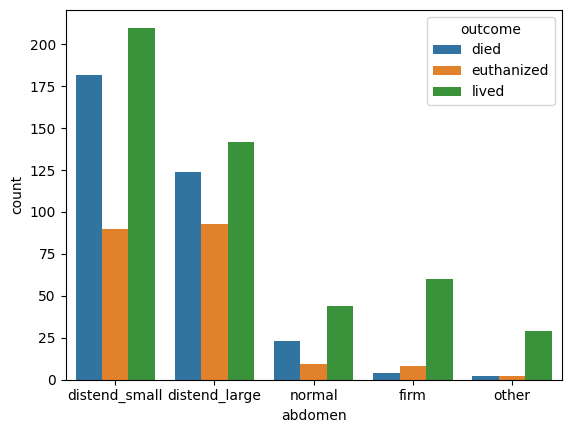

Stats of column  abdomo_appearance  : 
            count unique            top freq
outcome                                    
died         399      3  serosanguious  268
euthanized   231      3  serosanguious  133
lived        557      3         cloudy  196


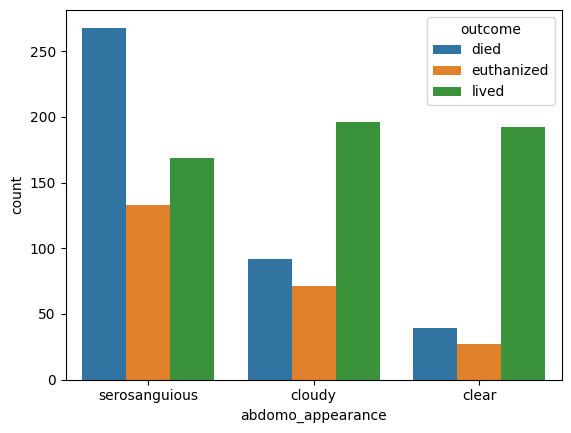

Stats of column  surgical_lesion  : 
            count unique  top freq
outcome                          
died         410      2  yes  375
euthanized   251      2  yes  179
lived        574      2  yes  375


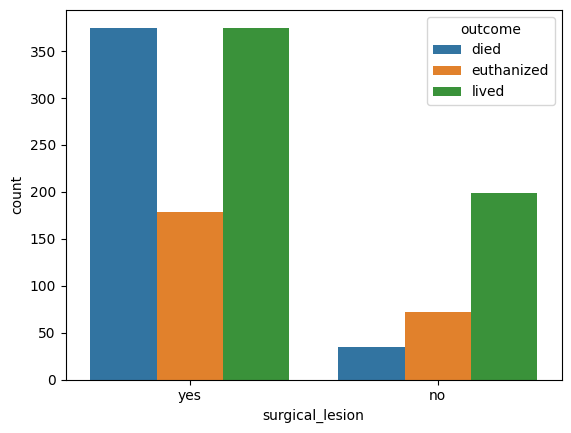

Stats of column  cp_data  : 
            count unique  top freq
outcome                          
died         410      2  yes  242
euthanized   251      2   no  178
lived        574      2  yes  353


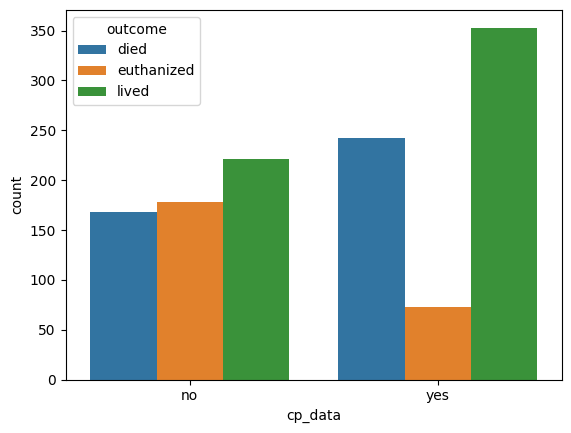

Stats of column  outcome  : 
            count unique         top freq
outcome                                 
died         410      1        died  410
euthanized   251      1  euthanized  251
lived        574      1       lived  574


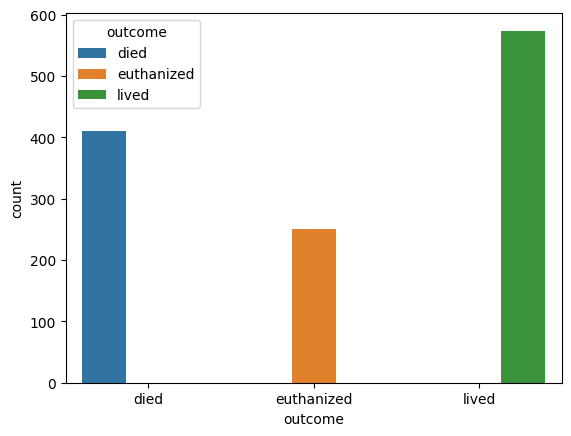

In [10]:
for i in nominal_col_list:
    print("Stats of column ",i," : \n",train_set.groupby(['outcome'])[i].describe())
    sns.countplot(data = train_set, x = i, hue = 'outcome')
    plt.show()

## Based on trends we enumerate the categories and map it in train_set

In [ ]:
model = tf.model.Sequential([
    tf.
])